# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

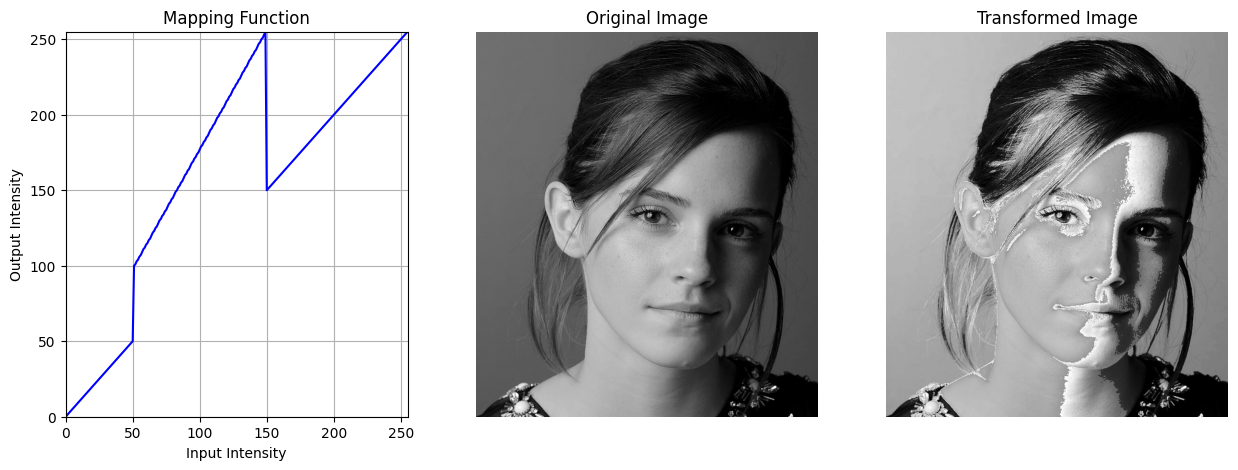

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
cp_emma = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(control_points,lut ):
    for i in range(len(control_points) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(cp_emma, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')




##  Brain Proton Density Image ##


### White Matter ###


<function matplotlib.pyplot.show(close=None, block=None)>

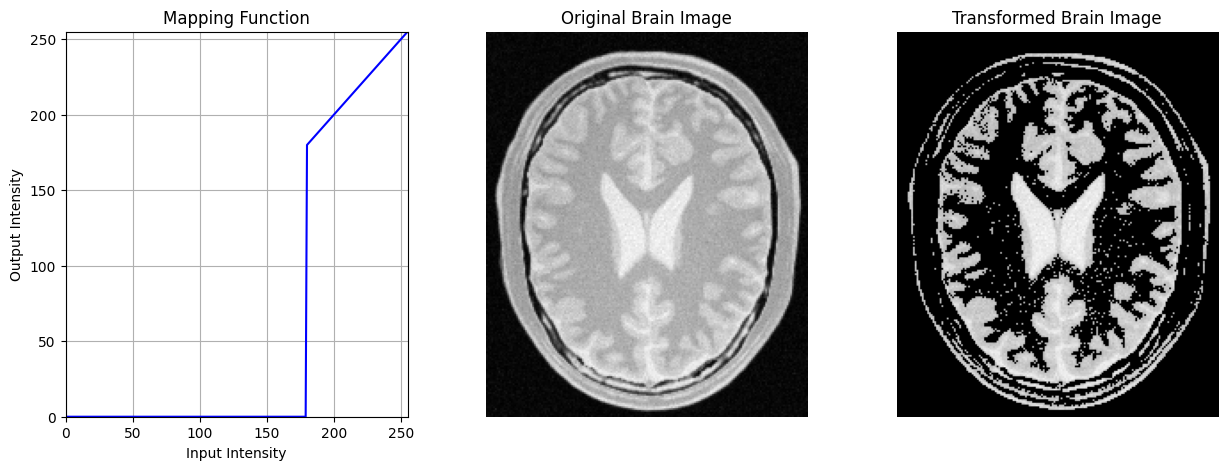

In [2]:
cp_wm = np.array([
    (0,0),
    (179,0),
    (180,180),
    (255,255)
])

wm_lut = np.zeros(256, dtype=np.uint8)

wm_lut = linear_transform(cp_wm, wm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(wm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)



img_brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(132)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

img_brain_transformed_WM = cv2.LUT(img_brain, wm_lut)

plt.subplot(133)
plt.imshow(img_brain_transformed_WM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show

### Gray Matter


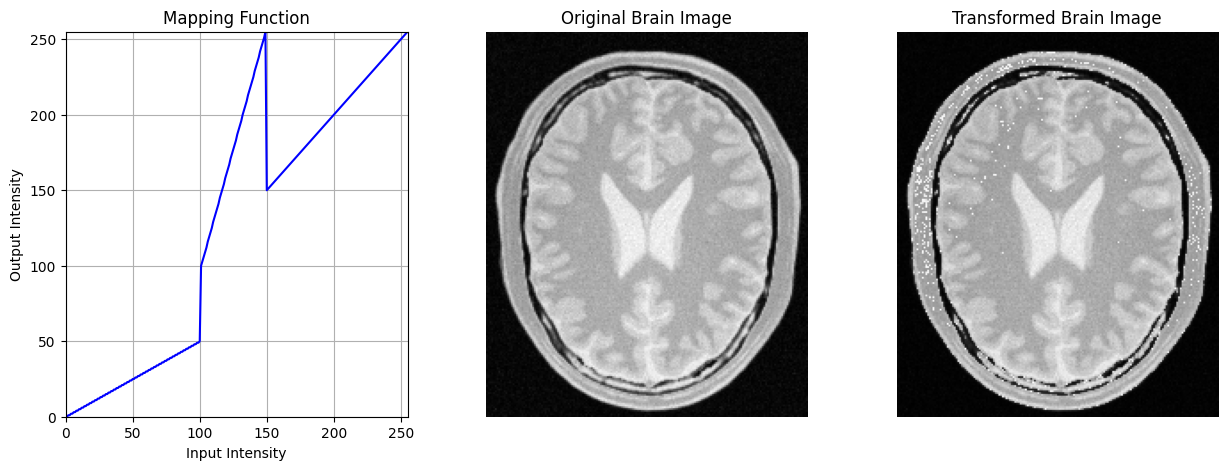

In [3]:
cp_gm = np.array([
   (0, 0),
    (100, 50),
    (101, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], )

   
gm_lut = np.zeros(256, dtype=np.uint8) 
gm_lut = linear_transform(cp_gm, gm_lut)
img_brain_transformed_GM = cv2.LUT(img_brain, gm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(gm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)


plt.subplot(132)

plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_brain_transformed_GM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show()



## Applying Gamma Correction

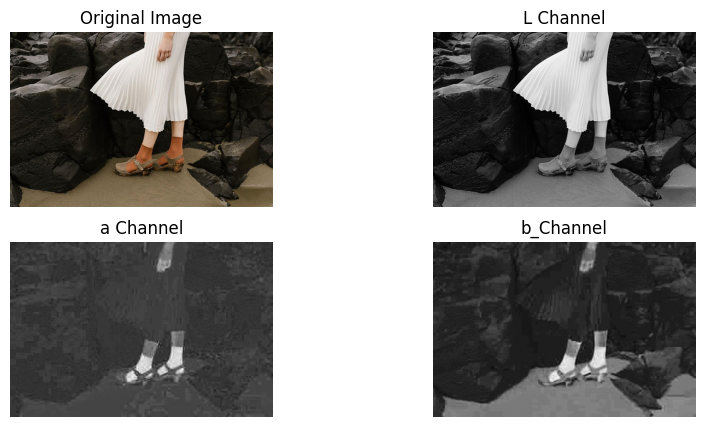

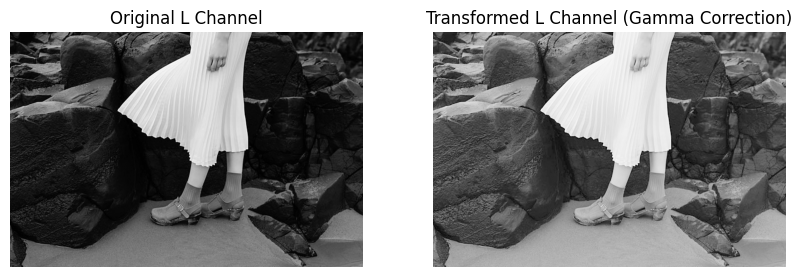

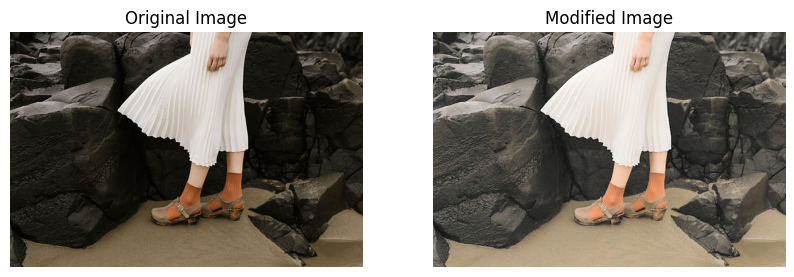

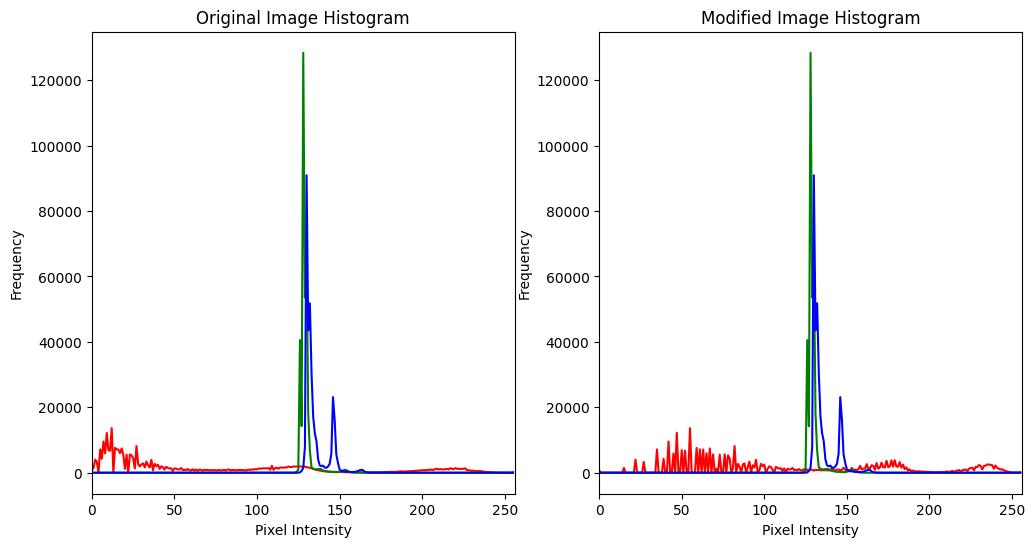

In [4]:
org_img = cv2.imread('a1images\highlights_and_shadows.jpg', cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

chnl_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2Lab)

L_channel, a_channel, b_channel = cv2.split(chnl_img)

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off') 

plt.subplot(222)
plt.imshow(L_channel, cmap='gray')
plt.title('L Channel')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap='gray')  
plt.title('b_Channel')
plt.axis('off')
plt.show()

gamma = 0.5
table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
L_channel_transformed = cv2.LUT(L_channel, table)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(L_channel, cmap='gray')
plt.title('Original L Channel')
plt.axis('off')

plt.subplot(122)
plt.imshow(L_channel_transformed , cmap='gray')
plt.title('Transformed L Channel (Gamma Correction)')
plt.axis('off')

# Merge the modified L channel with the original a and b channels
modified_lab_img = cv2.merge((L_channel_transformed, a_channel, b_channel))

# Convert back to RGB color space
modified_chnl_img = cv2.cvtColor(modified_lab_img, cv2.COLOR_Lab2BGR)
modified_rgb_img = cv2.cvtColor(modified_chnl_img, cv2.COLOR_BGR2RGB)

# Display the original and modified RGB images
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(rgb_img)
plt.title('Original Image') 
plt.axis('off')
plt.subplot(122)
plt.imshow(modified_rgb_img)
plt.title('Modified Image')
plt.axis('off')

#The histograms of the original and corrected images
fig,ax = plt.subplots(1, 2, figsize=(12, 6))
space = ('l', 'a', 'b')
colors = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv2.calcHist([chnl_img], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=colors[i])
    hist_gamma = cv2.calcHist([modified_lab_img], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=colors[i])

ax[0].set_title('Original Image Histogram')
ax[1].set_title('Modified Image Histogram')
ax[0].set_xlim([0, 256])
ax[1].set_xlim([0, 256])
ax[0].set_xlabel('Pixel Intensity')
ax[1].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
plt.show()    






## Increasing the vibrance of a photograph



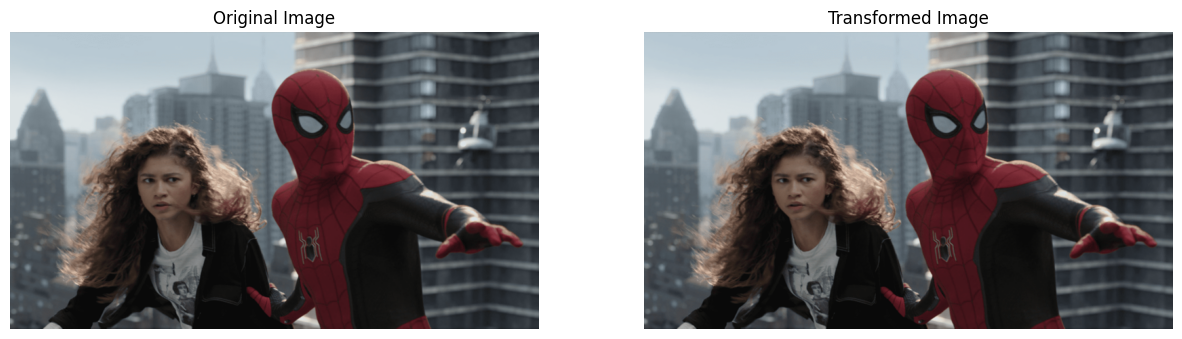

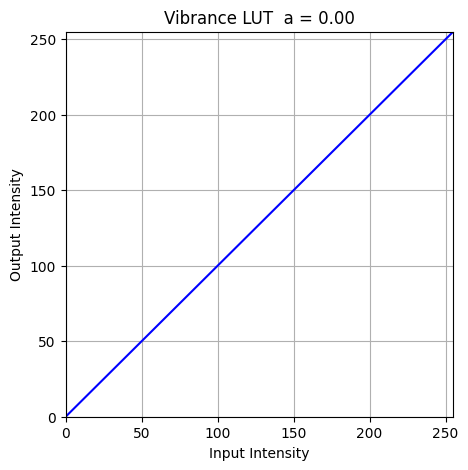

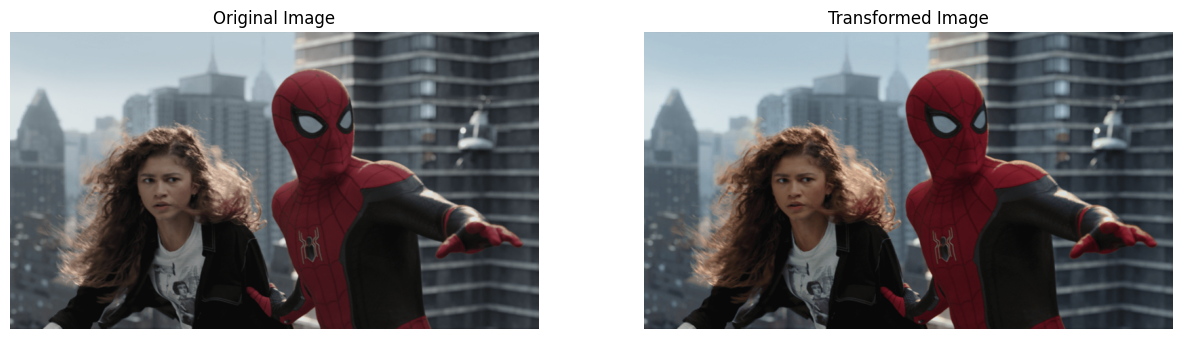

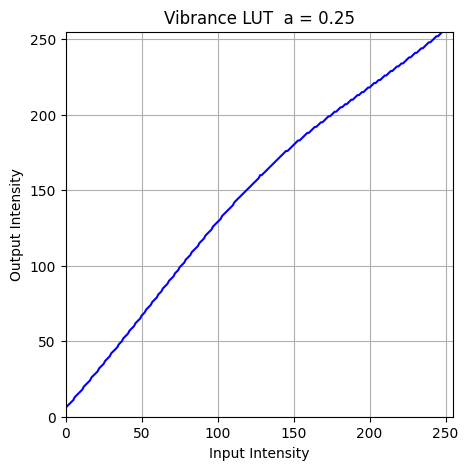

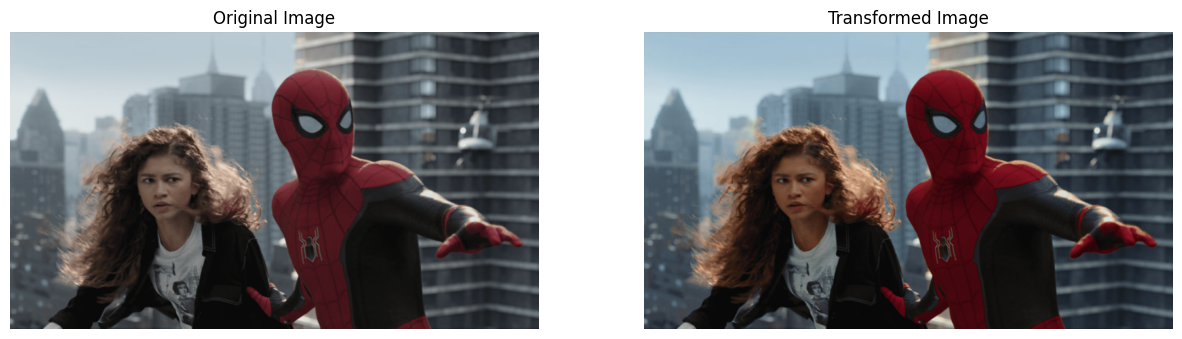

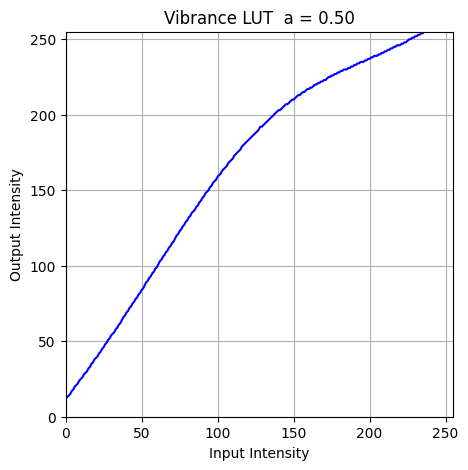

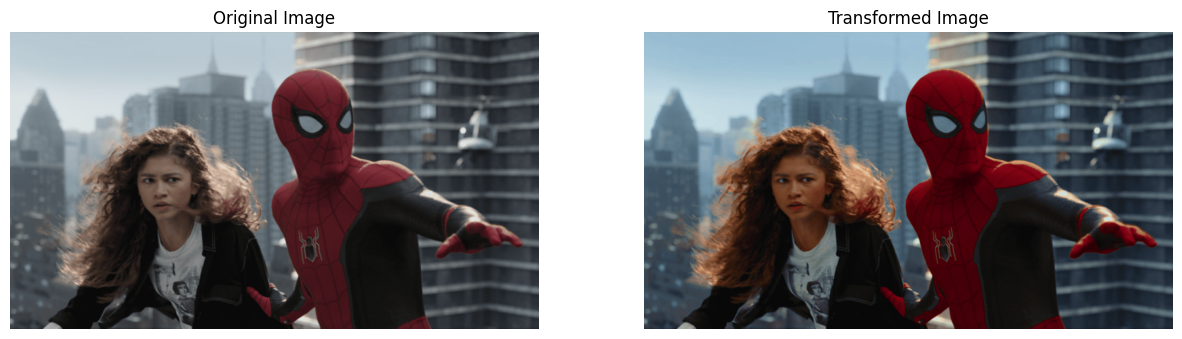

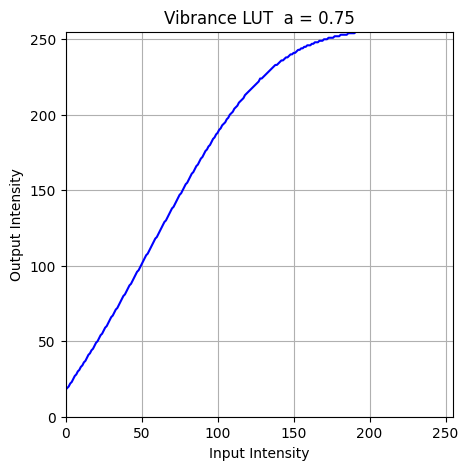

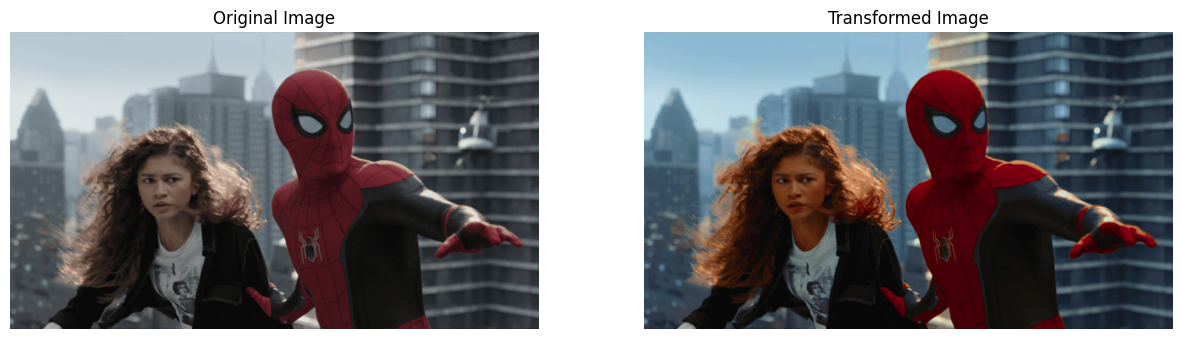

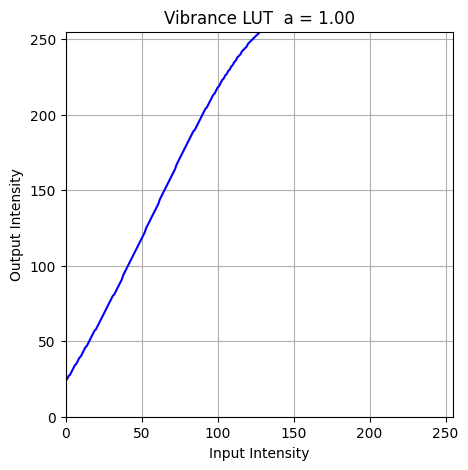

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


def vibrance_transform(image, a, sigma=70):
    
    
    rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    hsv_img = cv.cvtColor(rgb_img, cv.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv.split(hsv_img)

    lut = np.array([int(min(x + (a * 128) * np.exp((-(x - 128) ** 2) / (2 * (sigma ** 2))), 255)) for x in range(256)], dtype=np.uint8)

    s_channel_transformed = cv.LUT(s_channel, lut)
    hsv_img_transformed = cv.merge((h_channel, s_channel_transformed, v_channel))
    rgb_img_transformed = cv.cvtColor(hsv_img_transformed, cv.COLOR_HSV2BGR)
    
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plt.imshow(rgb_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(rgb_img_transformed)
    plt.title('Transformed Image')
    plt.axis('off')

    intensity_values = np.arange(256)
    plt.figure(figsize=(5, 5))
    plt.plot(intensity_values, lut, color='blue')
    plt.title('Vibrance LUT  a = {:.2f}'.format(a))
    plt.xlabel('Input Intensity')
    plt.ylabel('Output Intensity')
    plt.grid()
    plt.xlim(0, 255)
    plt.ylim(0, 255)
    plt.show()

spider_img = cv.imread('a1images/spider.png',cv2.IMREAD_COLOR)

a_value = [i*0.25 for i in range(0, 5, 1)]        # Example values for 'a'

for a in a_value:
    vibrance_transform(spider_img, a)